In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from src import plotter

# Data Manipulation
import pandas as pd
# Calculations and Numerical Operations
import numpy as np
# Data Visualization
import plotly
from plotly import tools
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.tools import make_subplots

import squarify

#Geographic Data Visualization
import geopandas as gpd
from shapely.geometry import Point, Polygon, shape
import matplotlib.pyplot as plt


import scipy.stats as stats
import pyspark as ps
import pyspark.sql.functions as F


In [32]:
# Cell for helper functions
crime_2003 = pd.read_csv('data/2003.csv')
crime_2004 = pd.read_csv('data/2004.csv')
crime_2005 = pd.read_csv('data/2005.csv')
crime_2006 = pd.read_csv('data/2006.csv')
crime_2007 = pd.read_csv('data/2007.csv')
crime_2008 = pd.read_csv('data/2008.csv')
crime_2009 = pd.read_csv('data/2009.csv')
crime_2010 = pd.read_csv('data/2010.csv')
crime_2011 = pd.read_csv('data/2011.csv')
crime_2012 = pd.read_csv('data/2012.csv')
crime_2013 = pd.read_csv('data/2013.csv')
crime_2014 = pd.read_csv('data/2014.csv')
crime_2015 = pd.read_csv('data/2015.csv')
crime_2016 = pd.read_csv('data/2016.csv')
crime_2017 = pd.read_csv('data/2017.csv')

In [33]:
crime_years = [crime_2003, crime_2004, crime_2005, crime_2006, crime_2007, crime_2008, 
               crime_2009, crime_2010, crime_2011, crime_2012, crime_2013, crime_2014, 
               crime_2015, crime_2016, crime_2017]

years = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
         '2013', '2014', '2015', '2016', '2017']

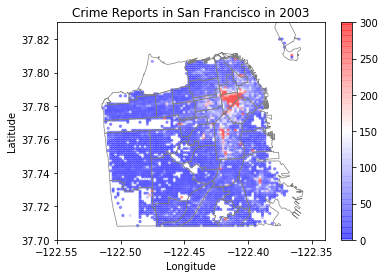

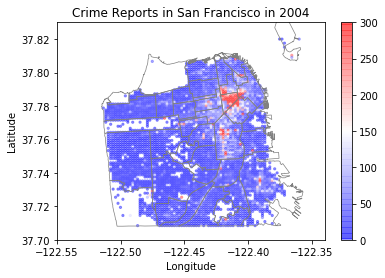

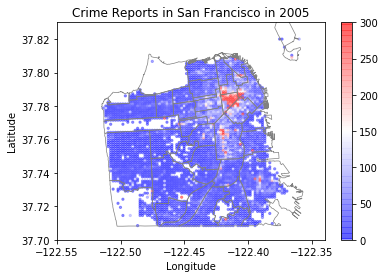

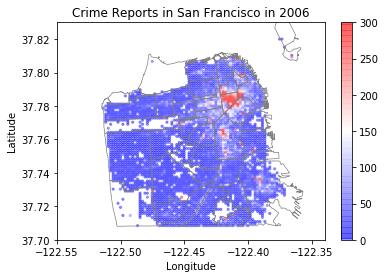

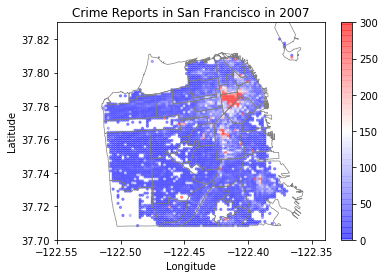

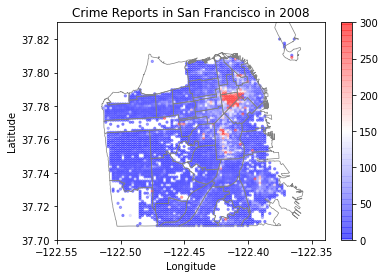

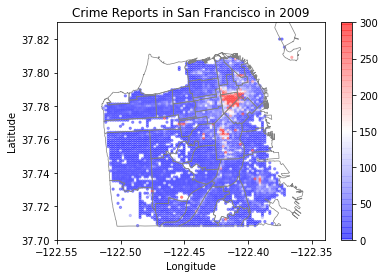

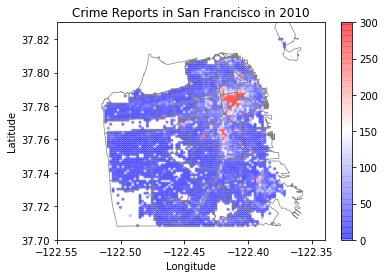

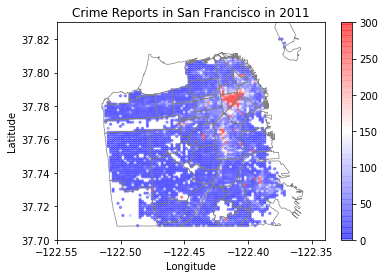

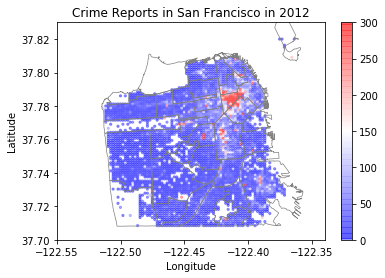

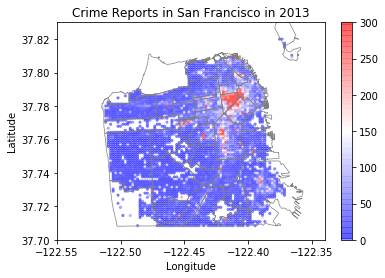

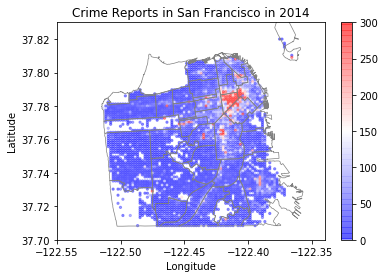

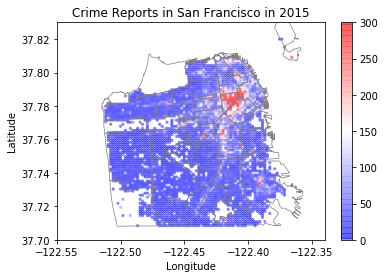

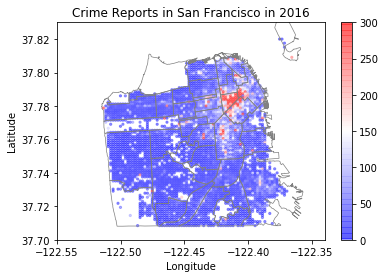

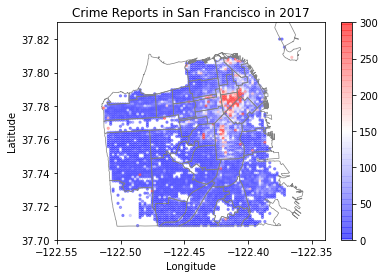

In [55]:
#array, lat, long, mag = plotter.binning(crime_2003)
for year, data in zip(years, crime_years):
    plotter.plot_scatter(data, year)

In [38]:
crime_map = pd.DataFrame({'Lat': pd.Series(lat),
                              'Long': pd.Series(long),
                              'Count': pd.Series(mag)})
crime_map.replace(to_replace=0.0, value=np.nan, inplace=True)
    


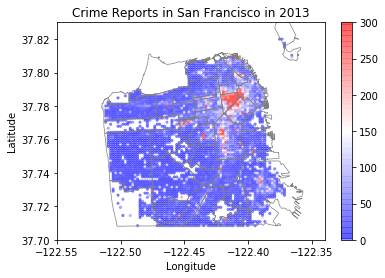

In [54]:
plotter.plot_scatter(crime_2013, '2013')

![SegmentLocal](crime.gif "segment")

In [8]:
lat_series = pd.Series(lat)
long_series = pd.Series(long)
mag_series = pd.Series(mag)
crime_map = pd.DataFrame({'Lat': lat_series, 'Long': long_series, 'Count': mag_series})
crime_map.replace(to_replace=0.0, value=np.nan, inplace=True)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(crime_map['Long'], crime_map['Lat'], c=crime_map['Count'], vmin=0, vmax=200, alpha=.7, s=5)
ax.set_xlim(-122.575, -122.32)
ax.set_ylim(37.7, 37.82)
plt.savefig('2003.png', dpi=350)



In [ ]:
from matplotlib.colors import LogNorm
np.place(crime_array, crime_array == np.nan, 0)
img = plt.imread('pd_district.png')

fig, ax = plt.subplots()
#ax.imshow(img)
im = ax.imshow(crime_array, vmin = 0, vmax=500, cmap='bwr', alpha=0.5, interpolation='none')
fig.colorbar(im, ax=ax)
plt.show()
  


In [ ]:
crime_2003 = pd.read_csv('data/2003.csv')
plt.plot(crime_2003['X'], crime_2003['Y'], 'ro',alpha=0.002)
plt.ylim(37.7,37.83)
plt.xlim(-122.6, -122.3)


In [ ]:
import plotly.express as px
fig = px.density_mapbox(df, lat=crime_2003, lon=crime_2003['Y'], z='Magnitude', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [ ]:
array, lat, long, mag = plotter.binning(crime_2003)


In [ ]:
subset = crime_2003.iloc[:20000, :]
array, lat, long, mag = plotter.binning(subset)
print(len(lat), len(long), len(mag))

(50000,)
(50000,)


(-122.6, -122.3)

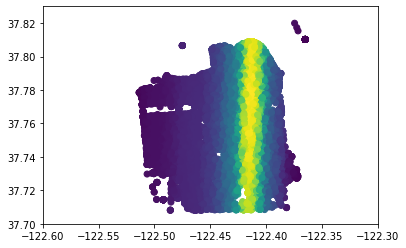

In [36]:
xy = np.vstack([subset['X'], subset['Y']])
z = stats.gaussian_kde(xy)(xy) # This defines the heat map aspect
print(z.shape)
print(subset['X'].shape)
plt.scatter(subset['X'], subset['Y'], c=z, alpha=.4)
plt.ylim(37.7,37.83)
plt.xlim(-122.6, -122.3)

In [10]:
import plotly.figure_factory as ff
pyo.init_notebook_mode()

array_small = array[40:50,40:50]
array_small

z = [[.1, .3, .5, .7, .9],
     [1, .8, .6, .4, .2],
     [.2, 0, .5, .7, .9],
     [.9, .8, .4, .2, 0],
     [.3, .4, .5, .7, 1]]


iplot(z)

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [[0.1, 0.3, 0.5, 0.7, 0.9], [1, 0.8, 0.6, 0.4, 0.2], [0.2, 0, 0.5, 0.7, 0.9], [0.9, 0.8, 0.4, 0.2, 0], [0.3, 0.4, 0.5, 0.7, 1]]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth',
                     'choroplethmapbox', 'cone', 'contour',
                     'contourcarpet', 'densitymapbox', 'funnel',
                     'funnelarea', 'heatmap', 'heatmapgl',
                     'histogram', 'histogram2d',
                     'histogram2dcontour', 'image', 'indicator',
                     'isosurface', 'mesh3d', 'ohlc', 'parcats',
                     'parcoords', 'pie', 'pointcloud', 'sankey',
                     'scatter', 'scatter3d', 'scattercarpet',
                     'scattergeo', 'scattergl', 'scattermapbox',
                     'scatterpolar', 'scatterpolargl',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

(100, 100)

![alttext](data/images/car_theft.png)